https://www.piie.com/blogs/realtime-economic-issues-watch/trumped-mexican-economy-2017-and-beyond

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the dataset for dollar to pesos exchange rate
dollar_to_pesos = pd.read_csv('DEXMXUS.csv')
dollar_to_pesos['DATE'] = pd.to_datetime(dollar_to_pesos['DATE'], format='%Y-%m-%d')
dollar_to_pesos['DEXMXUS'] = pd.to_numeric(dollar_to_pesos['DEXMXUS'], errors='coerce')
dollar_to_pesos = dollar_to_pesos.dropna(subset=['DEXMXUS'])

# Function to plot exchange rate data for each event
def plot_event_data(event_name, start_date, end_date, data):
    # Filter data for the event period
    mask = (data['DATE'] >= start_date) & (data['DATE'] <= end_date)
    event_data = data.loc[mask]
    
    if event_data.empty:
        print(f"No data available for the event '{event_name}' between {start_date} and {end_date}")
        return

    # Find the minimum and maximum points
    min_value = event_data['DEXMXUS'].min()
    max_value = event_data['DEXMXUS'].max()
    min_date = event_data.loc[event_data['DEXMXUS'] == min_value, 'DATE'].iloc[0]
    max_date = event_data.loc[event_data['DEXMXUS'] == max_value, 'DATE'].iloc[0]

    # Calculate percentage change
    pct_change = ((max_value - min_value) / min_value) * 100

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(event_data['DATE'], event_data['DEXMXUS'], label='MXN/USD Exchange Rate', color='blue')
    plt.title(f'{event_name} - MXN/USD Exchange Rate')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate (MXN/USD)')

    # Plot the line connecting low and high points
    plt.plot([min_date, max_date], [min_value, max_value], color='black', linestyle='--', label='Change Line')

    # Plot bubbles at the minimum and maximum points
    plt.scatter(min_date, min_value, color='red', s=200, zorder=5, edgecolor='black', label='Low Point')
    plt.scatter(max_date, max_value, color='green', s=200, zorder=5, edgecolor='black', label='High Point')

    # Annotate the minimum and maximum points with their values
    plt.text(min_date, min_value, f'Low: {min_value:.2f}', verticalalignment='bottom', horizontalalignment='right', fontsize=10, color='red', weight='bold')
    plt.text(max_date, max_value, f'High: {max_value:.2f}', verticalalignment='top', horizontalalignment='left', fontsize=10, color='green', weight='bold')

    # Annotate the percentage change
    mid_date = min_date + (max_date - min_date) / 2
    mid_value = (min_value + max_value) / 2
    plt.text(mid_date, mid_value, f'% Change: {pct_change:.2f}%', fontsize=12, color='grey', weight='bold', verticalalignment='center', horizontalalignment='center')

    plt.legend()
    plt.grid(True)
    plt.show()


## Event 1 & 2 --> Jan 15, 2022 AND Feb 26, 2022

### Early 2022 (General Timescope)
Trade and Economic Policies Event Analysis: Statements: In early 2022, Donald Trump made several comments regarding trade policies and criticized the USMCA (United States-Mexico-Canada Agreement), suggesting that it might need to be renegotiated. Impact: These statements potentially introduced market uncertainty and risk aversion. Concerns over possible changes to trade agreements or economic disruptions could have led to a weakening of the Mexican peso (MXN) as investors anticipated potential negative impacts on the Mexican economy.


###  January 15, 2022: 
In a rally in Florence, Arizona, Trump mentioned his border wall policies and criticized the Biden administration for undoing many of his immigration and trade policies related to Mexico.

### February 26, 2022: 
During his speech at the Conservative Political Action Conference (CPAC), Trump discussed the U.S.-Mexico border, emphasizing economic consequences, the flow of drugs, and how his administration’s policies, including the renegotiated USMCA trade deal, benefited American workers.


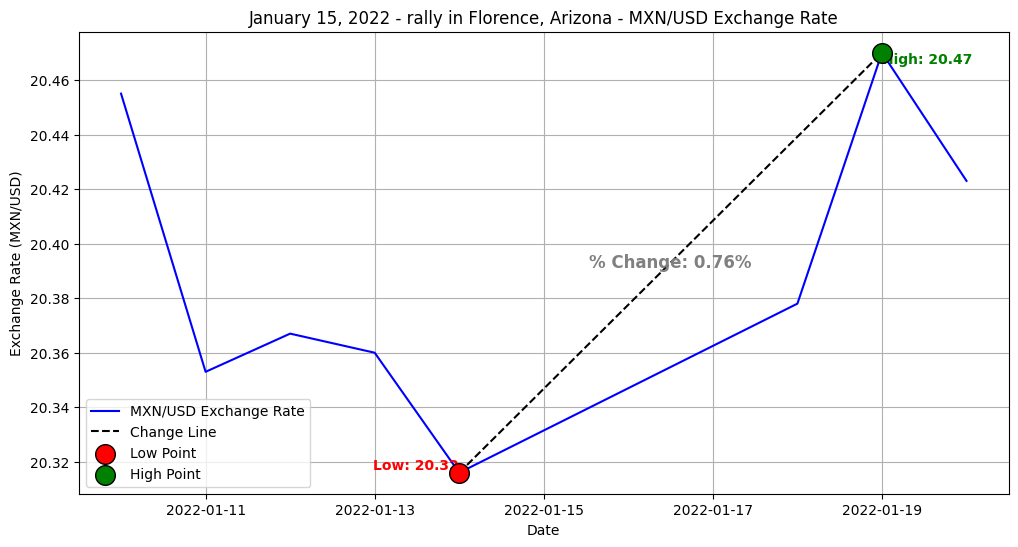

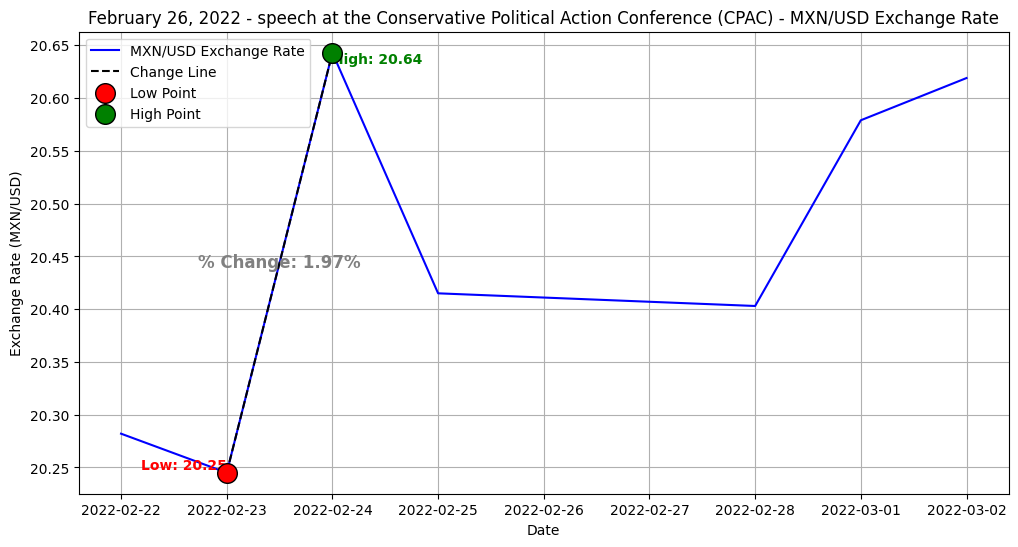

In [2]:
# Events to analyze
events = {
#    'Early 2022 - Trade and Economic Policies': ('2022-01-01', '2022-03-31'), ##This shows the opposite of what we want
    'January 15, 2022 - rally in Florence, Arizona': ('2022-01-10', '2022-01-20'),
    'February 26, 2022 - speech at the Conservative Political Action Conference (CPAC)': ('2022-02-21', '2022-03-02')
}

# Plot exchange rate data for each event
for event_name, (start_date, end_date) in events.items():
    plot_event_data(event_name, start_date, end_date, dollar_to_pesos)


## Event 3 - Nov 9, 2016
### Donald Trump Presidential Victory

Source 1
https://money.cnn.com/2016/11/09/investing/mexican-peso-trump-us-election/index.html
The Mexican peso is getting clobbered after Donald Trump's stunning victory in the U.S. presidential election.

Source 2
https://www.washingtonpost.com/world/the_americas/with-trump-victory-mexicos-worst-fears-are-realized/2016/11/09/f36a9ac0-a680-11e6-ba46-53db57f0e351_story.html
MEXICO CITY — In America's modern history, few U.S. presidents have come to power as openly hostile to their southern neighbor as Donald Trump. His opening campaign salvos — describing Mexican immigrants as criminals or rapists — seemed almost tame by the time he clinched victory, after so many threats to cut off jobs going to Mexico, deport millions of unauthorized immigrants and build a wall on the border.
His victory stunned, saddened and worried Mexicans, forcing the country’s highest government officials Wednesday morning to call for calm and pledge to work with the United States. The wave of national anxiety sent financial markets here into turmoil as a new, uncertain era in relations with the United States began.
Mexico’s Central Bank has regularly raised interest rates over the past year in an attempt to contain the peso’s losses and tamp down inflation. The peso, which was trading around 18 to the dollar on Tuesday, dropped to more than 20 to the dollar after Trump’s win appeared imminent.


Other Data (Chatgpt)
November 9, 2016: The peso fell sharply after Donald Trump won the U.S. presidential election. On this day, the peso weakened by approximately 13% against the U.S. dollar, hitting a record low of about 20.80 MXN/USD.



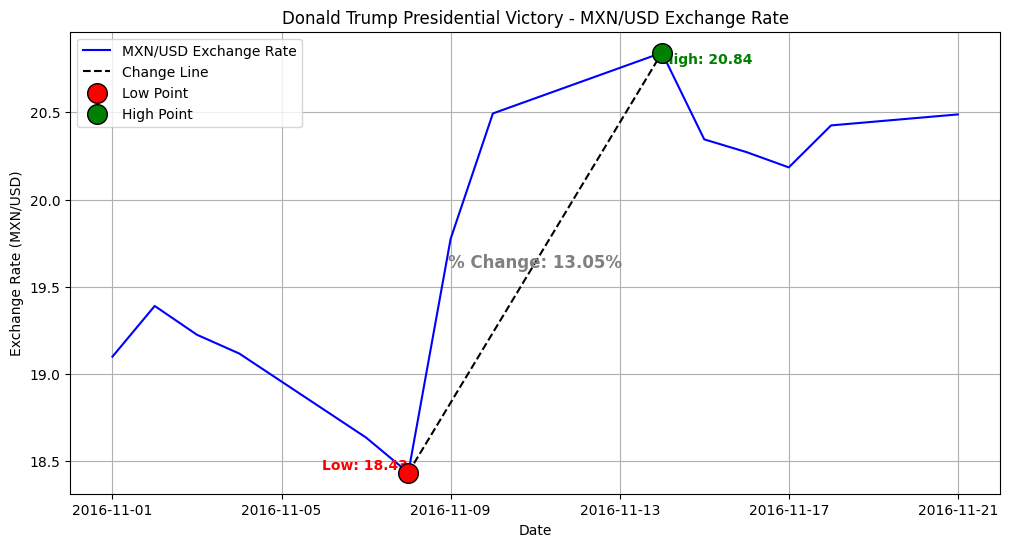

In [3]:
# Events to analyze
events = {
    'Donald Trump Presidential Victory': ('2016-11-1', '2016-11-21'),
}

# Plot exchange rate data for each event
for event_name, (start_date, end_date) in events.items():
    plot_event_data(event_name, start_date, end_date, dollar_to_pesos)

## Event 4
### March 3 2017
https://www.cnbc.com/2017/03/03/trumps-fallout-effect-on-the-mexican-peso.html

While everyone in America was eagerly awaiting Donald Trump’s speech to Congress on Tuesday, some investors were nervous about what he might say on trade. On the day of the speech, the Mexican peso fell by nearly 1 percent against the U.S. dollar, which would be a significant jump if it wasn’t for the fact that the peso has fallen by 12 percent since the U.S. election. It’s the second worst-performing currency other than the Turkish Lira since Nov. 8. At press time Friday morning the US dollar/Mexico peso spot rate was 19.84.

For many years the peso had been considered an emerging market proxy — it tends to move depending on what’s happening in other developing nations, not just on what’s occurring at home — but Trump’s rhetoric on trade and immigration is now causing the currency to shift based on American politics. That’s putting its proxy status at risk.

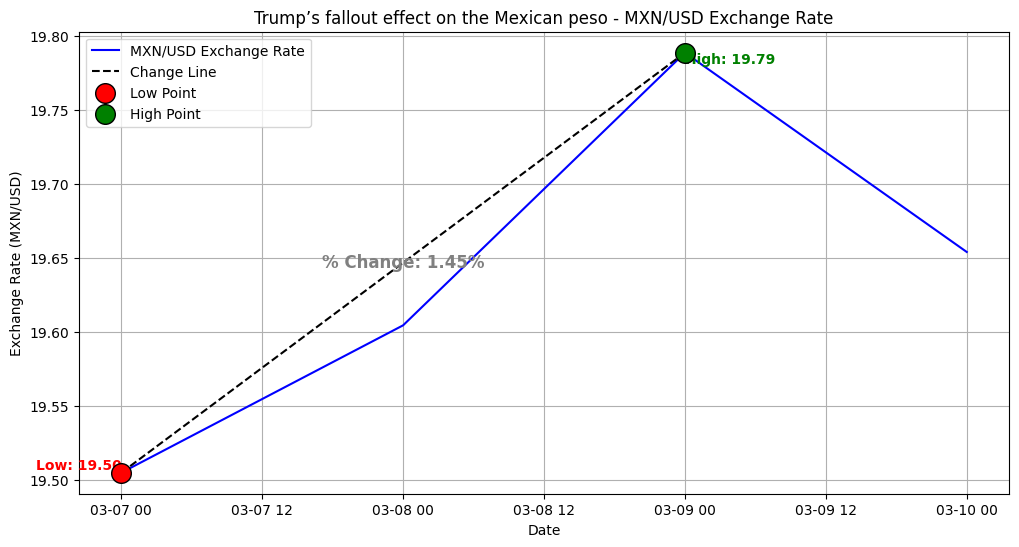

In [4]:
# Events to analyze
events = {
    'Trump’s fallout effect on the Mexican peso': ('2017-03-07', '2017-03-12'),
}

# Plot exchange rate data for each event
for event_name, (start_date, end_date) in events.items():
    plot_event_data(event_name, start_date, end_date, dollar_to_pesos)

## Event 5

## Assasination Event - 16th July, 2024

https://mexicobusiness.news/finance/news/stocks-peso-drop-after-assassination-attempt-donald-trump

The stock markets in Mexico and the Mexican peso are experiencing declines in the wake of an assassination attempt on former US President Donald Trump, a situation expected to increase his popularity and enhance his chances in the upcoming elections.

At the end of Monday's trading session, the exchange rate for the Mexican peso was MX$17.7649 per dollar, showing a 0.81% depreciation compared to MX$17.6223 per dollar at Friday's close. "The peso depreciation primarily stems from the heightened likelihood of Donald Trump winning the presidency on Nov. 5, following the recent attack. Today marks the commencement of the Republican National Convention, where his candidacy is expected to be officially confirmed," stated Banco Base.



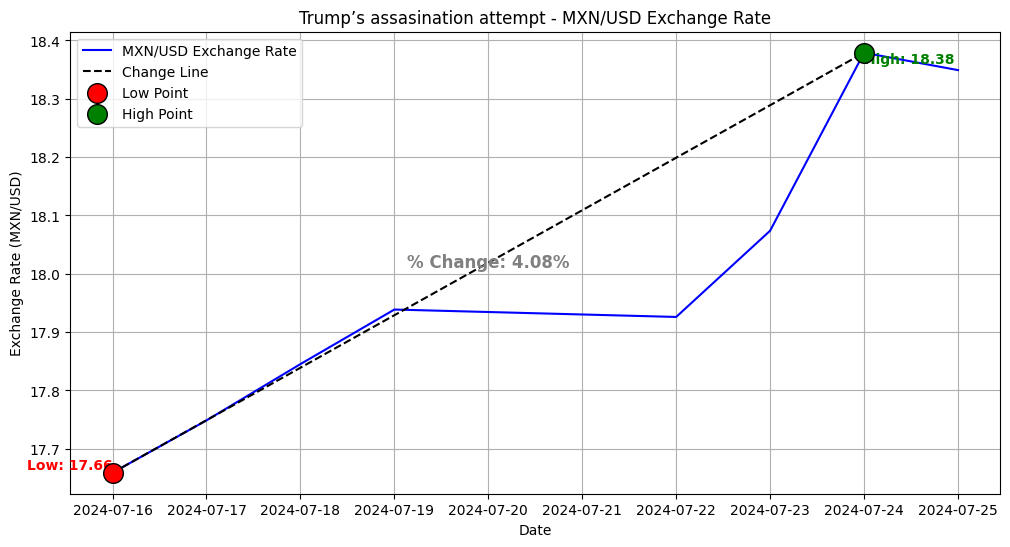

In [5]:
# Events to analyze
events = {
    'Trump’s assasination attempt': ('2024-07-16', '2024-07-25'),
}

# Plot exchange rate data for each event
for event_name, (start_date, end_date) in events.items():
    plot_event_data(event_name, start_date, end_date, dollar_to_pesos)

## Event 6 - Jan 2017

The weakness in the Mexican peso looks like it will continue in 2017 as traders come to grips with potential changes in U.S. trade policy.

“The market is increasingly convinced Donald Trump wasn’t kidding around about tackling Mexico and production in Mexico,” said Adam Button, currency analyst at ForexLive.com.

The peso fell for a second straight day Wednesday to record lows against the U.S. dollar as traders worried about the negative impact of President-elect Donald Trump’s policies on the Mexican economy.

Trump has called for an overhaul of the North American Free Trade Agreement and building a wall on the U.S.-Mexico border. As a result, the was widely watched as a proxy on the election result during the presidential campaign.

Carl Forcheski, director, corporate FX sales, America, at Societe Generale, pointed out that after a postelection spike, the dollar-peso had traded in a range in December.

Then on Tuesday, the peso weakened after Ford Motor announced it will cancel production of a $1.6 billion plant in Mexico, and instead invest in Michigan. Trump had bashed the automaker for moving jobs outside the United States. Ford CEO Mark Fields said on CNBC’s “Halftime Report” that the decision not to invest in Mexico was based on its forecast for demand.

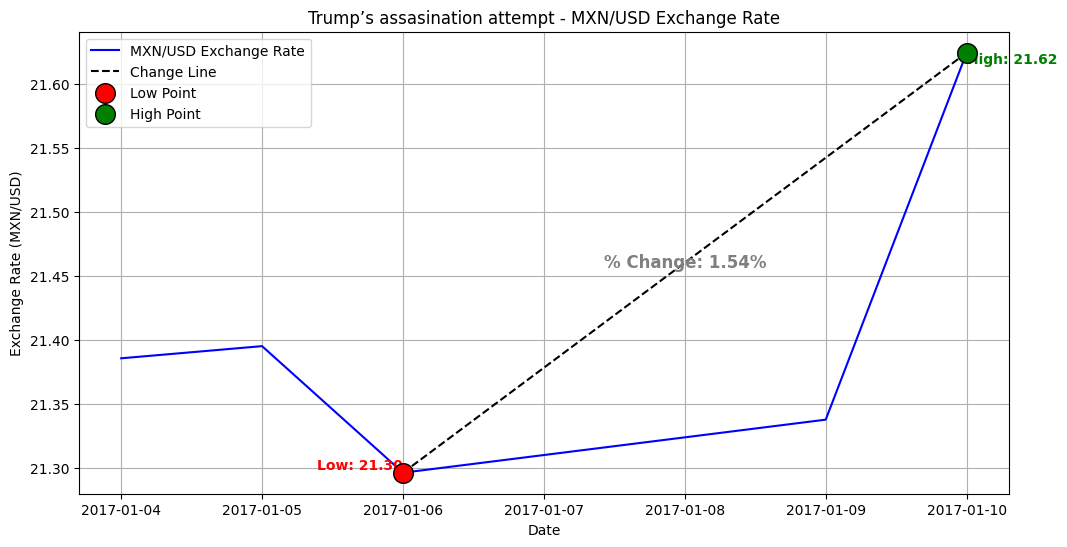

In [6]:
# Events to analyze
events = {
    'Trump’s assasination attempt': ('2017-01-04', '2017-01-10'),
}

# Plot exchange rate data for each event
for event_name, (start_date, end_date) in events.items():
    plot_event_data(event_name, start_date, end_date, dollar_to_pesos)

## Event 7 - Biden's position becomes stronger; increasing Peso Value

### November 5, 2020 - Mexican peso hits 8-month high as Biden leads in tight election race

Mexico's peso touched its highest level in
nearly eight months against a weakening dollar on Thursday,
while emerging market stocks hit multi-year highs as Democratic
candidate Joe Biden maintained a narrow lead in a tight U.S.
election race. 
The peso rose for the third straight day, jumping
over 1% with a Biden victory seen as positive for the currency,
which has suffered from President Donald Trump's hard line on
trade in recent years.  

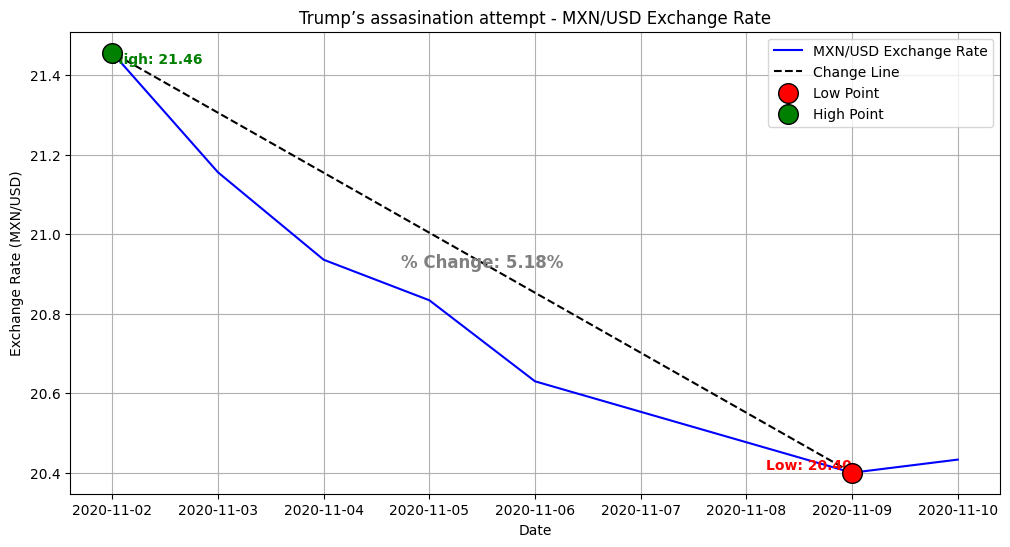

In [7]:
# Events to analyze
events = {
    'Trump’s assasination attempt': ('2020-11-1', '2020-11-10'),
}

# Plot exchange rate data for each event
for event_name, (start_date, end_date) in events.items():
    plot_event_data(event_name, start_date, end_date, dollar_to_pesos)

## Event 8 - 13th Jan - 19th Jan

Following Trump's executive orders and continued rhetoric about NAFTA and trade policies, the peso weakened again. The currency dropped by around 2% against the dollar, reaching about 21.00 MXN/USD.

- https://trumpwhitehouse.archives.gov/presidential-actions/presidential-memorandum-regarding-withdrawal-united-states-trans-pacific-partnership-negotiations-agreement/
- https://www.cnbc.com/2017/01/23/trump-to-sign-executive-order-to-renegotiate-nafta-and-intent-to-leave-tpp.html
- https://fivethirtyeight.com/features/trump-could-really-mess-up-mexicos-economy/
- https://financialpost.com/news/economy/will-donald-trump-withdraw-from-nafta


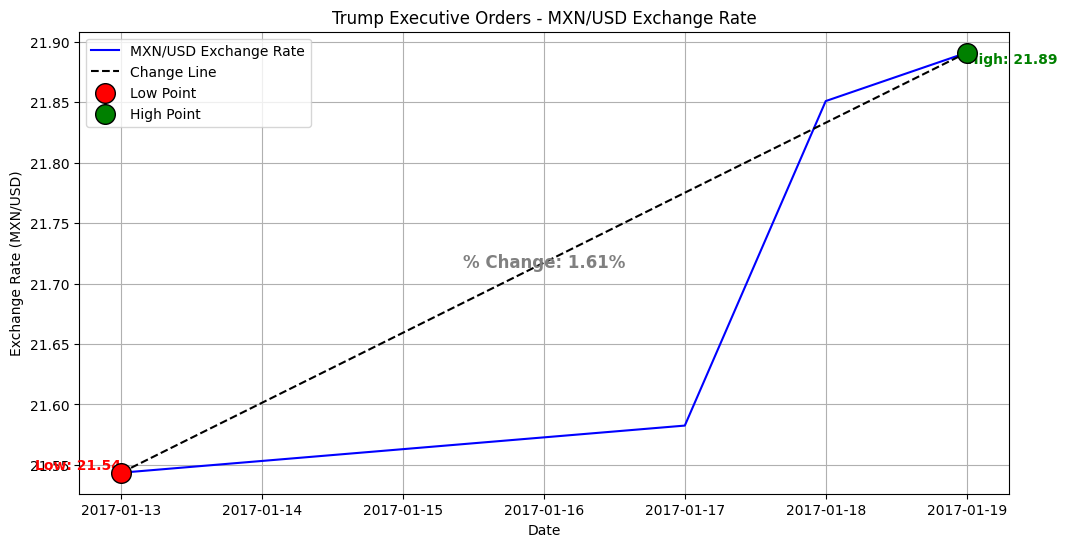

In [8]:
# Events to analyze
events = {
    'Trump Executive Orders': ('2017-01-13', '2017-01-19'),
}

# Plot exchange rate data for each event
for event_name, (start_date, end_date) in events.items():
    plot_event_data(event_name, start_date, end_date, dollar_to_pesos)

## Event 9 - Feb1, 2017

https://knowledge.wharton.upenn.edu/article/trumps-policies-economy-wharton-experts-weigh/

https://www.pbs.org/newshour/economy/column-trade-deficit-problem

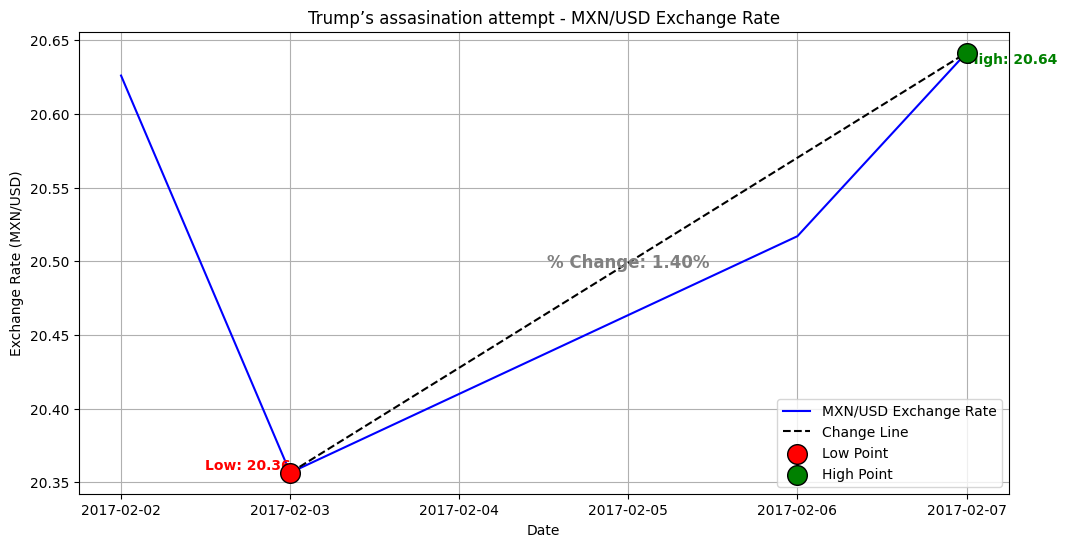

In [9]:
# Events to analyze
events = {
    'Trump’s assasination attempt': ('2017-2-2', '2017-02-7'),
}

# Plot exchange rate data for each event
for event_name, (start_date, end_date) in events.items():
    plot_event_data(event_name, start_date, end_date, dollar_to_pesos)

## Event 10 - Nakiyah - Jan 16th-17th 2024

"""https://mexiconewsdaily.com/business/a-trump-slump-for-the-peso/"""

"""Donald Trump’s victory in the 2024 Republican Party presidential caucuses in Iowa and other factors 
caused the Mexican peso to depreciate against the US dollar on Tuesday and in Wednesday morning trading, 
resulting in the currency reaching its weakest position in over a month.

he US dollar was trading at 17.38 pesos at around 8:30 a.m. Mexico City time on Wednesday, according to Bloomberg data.  
The last time the peso was weaker than that level was Dec. 11.

After depreciating to 17.38 to the dollar, the peso appreciated slightly to trade at 17.34 to the dollar at 10 a.m. and 17.26 at 11 a.m.
The low the peso reached on Wednesday morning represented a 2.9% decline 
compared to the currency’s position of 16.88 to the dollar at the close of markets on Monday.
On Tuesday, the peso depreciated more than any other major currency, according to Banco Base director of economic analysis Gabriela Siller.
The slide came after Trump won a comprehensive victory in the Iowa caucuses, the first contest in the Republican Party’s 2024 presidential primary race."""

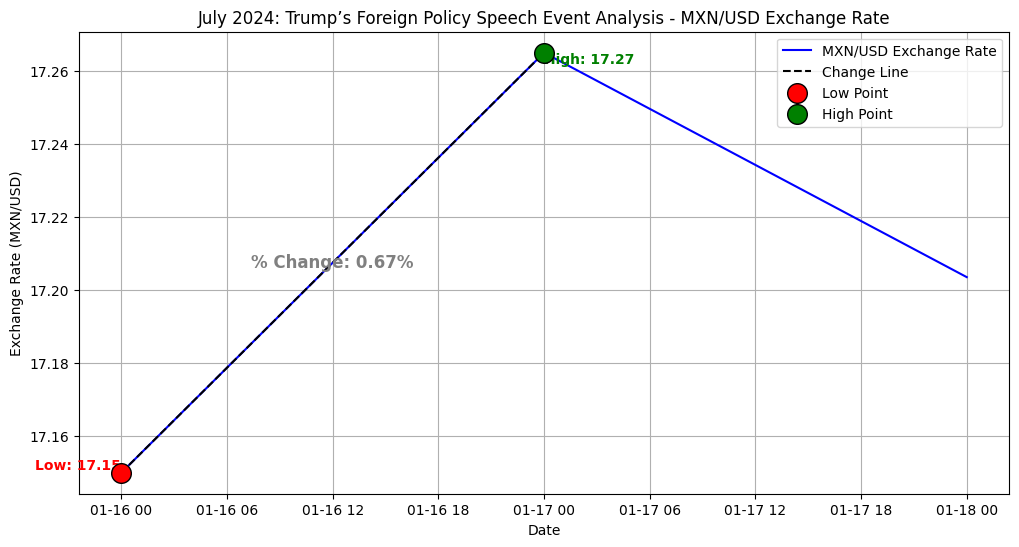

In [10]:
## YYYY-mm-dd
events = {
    'July 2024: Trump’s Foreign Policy Speech Event Analysis': ('2024-01-16', '2024-01-18'),
}

# Plot exchange rate data for each event
for event_name, (start_date, end_date) in events.items():
    plot_event_data(event_name, start_date, end_date, dollar_to_pesos)

## Feb 2024

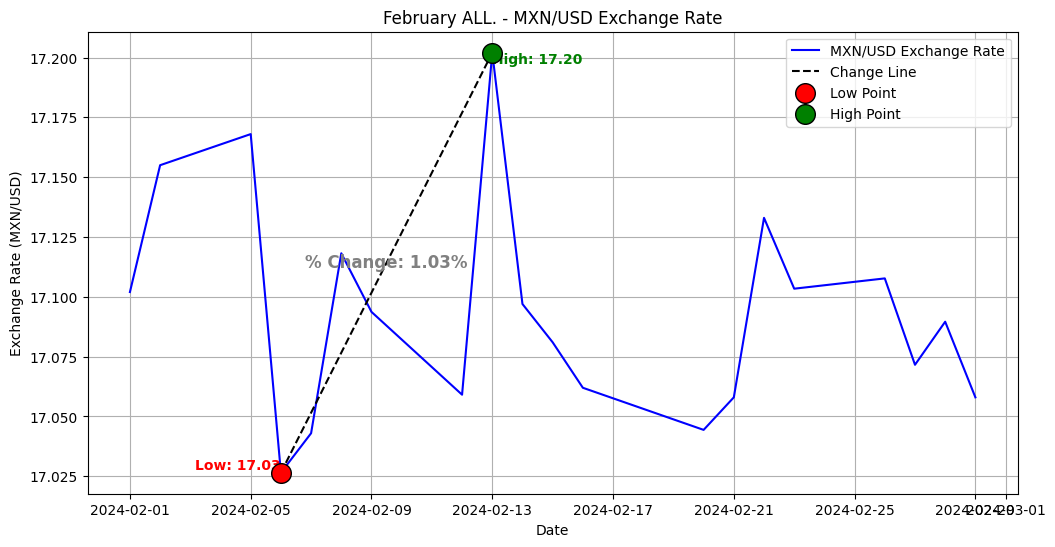

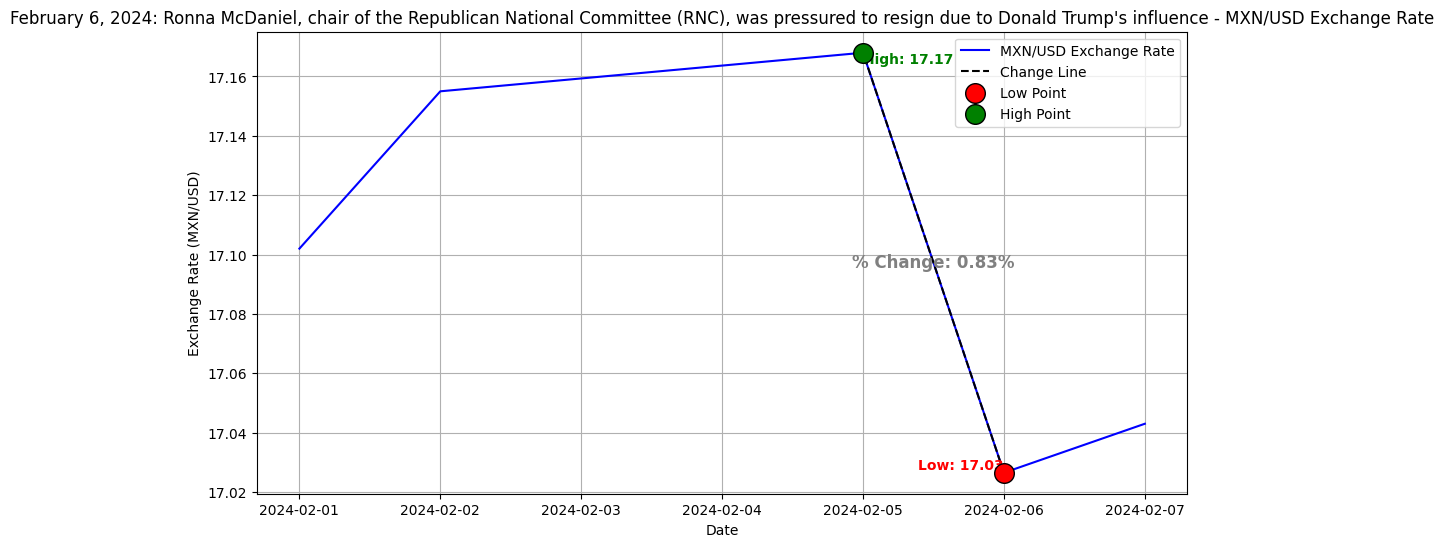

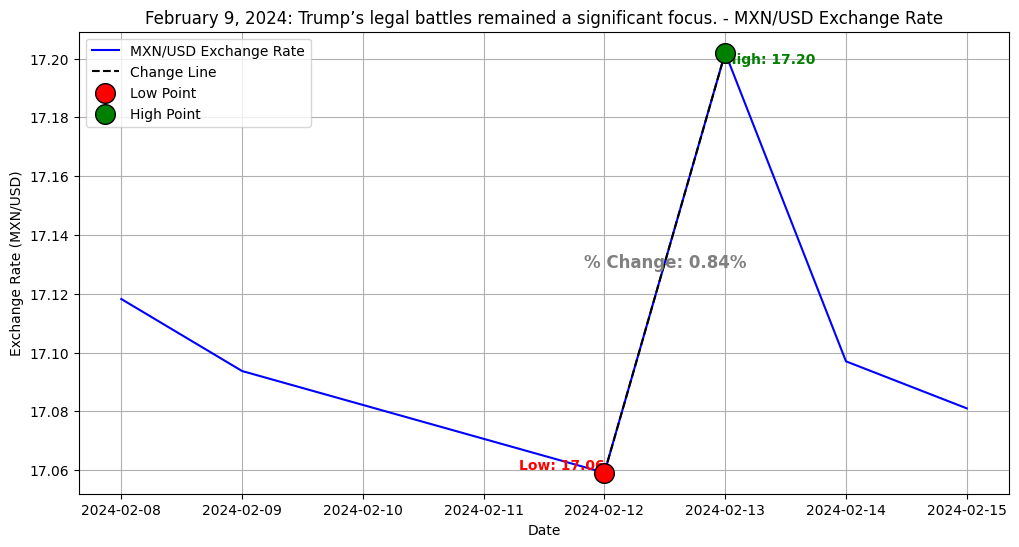

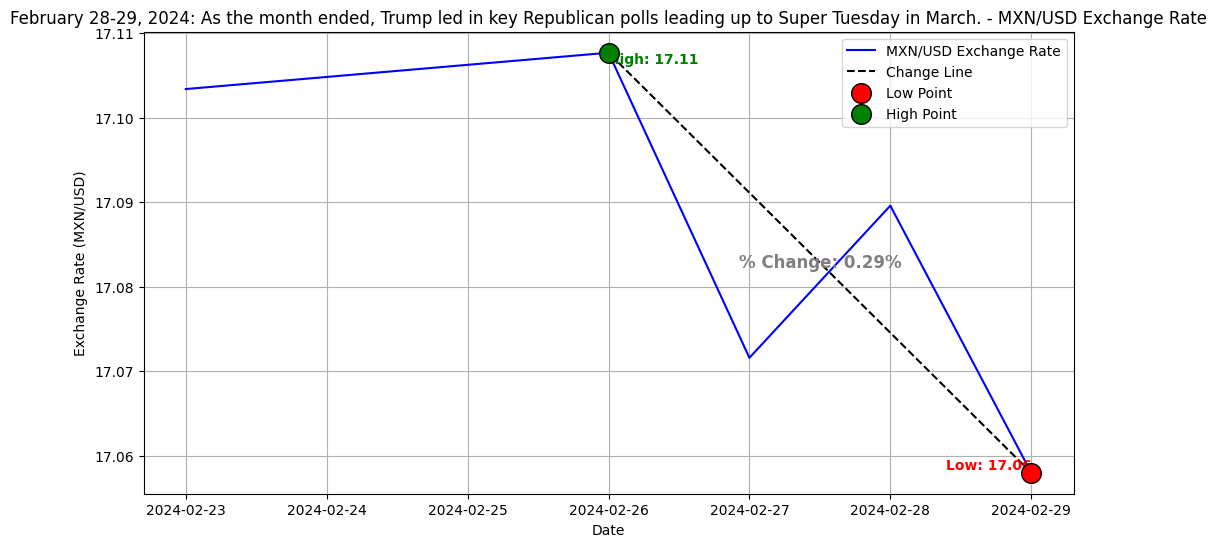

In [14]:
events = {
    "February ALL.": ('2024-02-01', '2024-02-29'),
    "February 6, 2024: Ronna McDaniel, chair of the Republican National Committee (RNC), was pressured to resign due to Donald Trump's influence": ('2024-02-01', '2024-02-07'),
    "February 9, 2024: Trump’s legal battles remained a significant focus.": ('2024-02-08', '2024-02-15'),
    "February 28-29, 2024: As the month ended, Trump led in key Republican polls leading up to Super Tuesday in March.": ('2024-02-23', '2024-02-29'),
    }

for event_name, (start_date, end_date) in events.items():
    plot_event_data(event_name, start_date, end_date, dollar_to_pesos)

## Event TO REMOVE - The MXN change is not matching

## Mexican Peso not favored by markets with Trump victory possibility increasing - 2nd July, 2024

https://www.fxstreet.com/news/mexican-peso-slides-lower-on-risk-of-trump-victory-202407021055

The Mexican Peso depreciates on the back of risk of Donald Trump winning the US presidential elections in November.
Such a victory would likely lead to higher tariffs on foreign imports, negatively impacting Mexico. 
Banxico Governor Victoria Rodríguez Ceja raises the possibility of interest-rate cuts coming down the track
The Mexican Peso (MXN) continues creeping lower in its most traded pairs on Tuesday as concerns mount that former US President Donald Trump could win the US presidential election in November and raise tariffs on Mexican imports. Meanwhile, commentary from Bank of Mexico (Banxico) Governor Victoria Rodríguez Ceja suggests the bank is moving closer to cutting interest rates, another negative factor for MXN. 


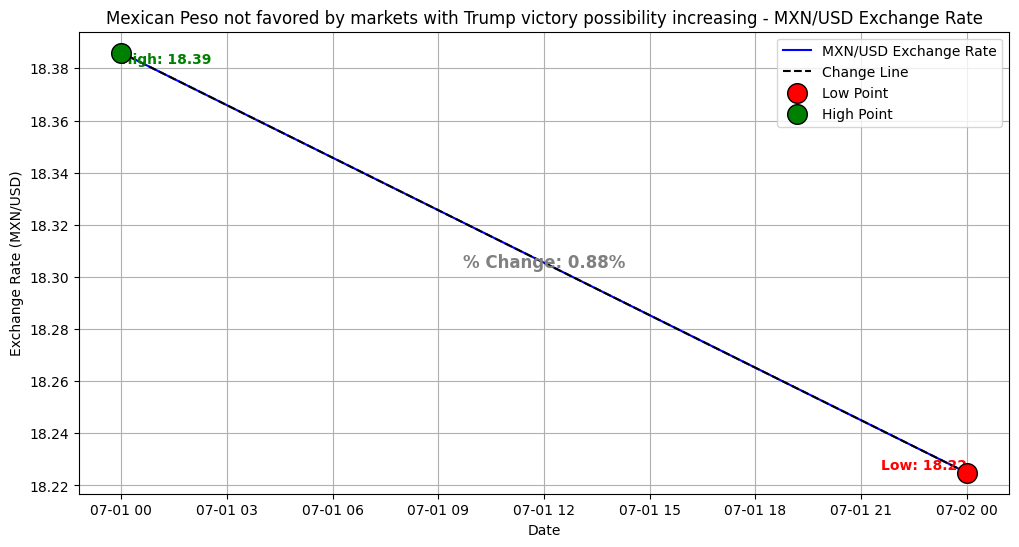

In [11]:
# Events to analyze
events = {
    'Mexican Peso not favored by markets with Trump victory possibility increasing': ('2024-7-1', '2024-7-2'),
}

# Plot exchange rate data for each event
for event_name, (start_date, end_date) in events.items():
    plot_event_data(event_name, start_date, end_date, dollar_to_pesos)

President Trump on Thursday said he would impose a 5% tariff on all goods entering from Mexico unless it stopped the flow of illegal immigration to the United States, a dramatic escalation of his border threats that could have sweeping implications for both economies.